In [1]:
import pandas as pd

In [2]:
import glob

iped_count = glob.glob('FieldOfStudyData*')
iped_count_data = []
for file_name in iped_count:
    df = pd.read_csv(file_name)
    year = file_name.split('_')[0][-4:]
    df['YEAR'] = int(year)
    iped_count_data.append(df)


all_iped_count = pd.concat(iped_count_data)
all_iped_count.to_csv('all_iped_count.csv')

In [3]:
institutions = pd.read_csv('hd2020.csv', encoding='cp1252')
merged = pd.merge(all_iped_count, institutions, on='UNITID')
merged = merged[merged['CARNEGIE']>=0]

In [39]:
merged['CARNEGIE']

0          16
1          16
2          16
3          16
4          16
           ..
1065385    15
1065386    15
1065387    15
1065388    15
1065389    15
Name: CARNEGIE, Length: 941844, dtype: int64

In [40]:
merged['INSTSIZE']

0          3
1          3
2          3
3          3
4          3
          ..
1065385    5
1065386    5
1065387    5
1065388    5
1065389    5
Name: INSTSIZE, Length: 941844, dtype: int64

In [3]:
iped_count

['FieldOfStudyData1819_1920_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'FieldOfStudyData1718_1819_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv']

In [6]:
all_iped_count

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,BBRR4_FED_COMP_DFLT,BBRR4_FED_COMP_DLNQ,BBRR4_FED_COMP_FBR,BBRR4_FED_COMP_DFR,BBRR4_FED_COMP_NOPROG,BBRR4_FED_COMP_MAKEPROG,BBRR4_FED_COMP_PAIDINFULL,BBRR4_FED_COMP_DISCHARGE,DISTANCE,YEAR
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,0,1920
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,0,1920
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,6.0,...,PS,PS,PS,PS,PS,PS,PS,PS,1,1920
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,1,1920
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,8.0,...,PS,PS,PS,PS,PS,PS,PS,PS,1,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214880,NaN,42817,Compton College,Public,1,5111,Health/Medical Preparatory Programs.,2,Associate's Degree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1516
214881,NaN,42817,Compton College,Public,1,5138,"Registered Nursing, Nursing Administration, Nu...",2,Associate's Degree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1516
214882,NaN,42817,Compton College,Public,1,5202,"Business Administration, Management and Operat...",2,Associate's Degree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1516
214883,NaN,42817,Compton College,Public,1,5203,Accounting and Related Services.,2,Associate's Degree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1516


In [7]:
all_iped_count['IPEDSCOUNT1']

0         NaN
1         NaN
2         6.0
3         7.0
4         8.0
         ... 
214880    NaN
214881    NaN
214882    NaN
214883    NaN
214884    NaN
Name: IPEDSCOUNT1, Length: 1161625, dtype: float64

In [8]:
all_iped_count['IPEDSCOUNT2']

0         NaN
1         NaN
2         3.0
3         7.0
4         4.0
         ... 
214880    NaN
214881    NaN
214882    NaN
214883    NaN
214884    NaN
Name: IPEDSCOUNT2, Length: 1161625, dtype: float64

In [9]:
all_iped_count['CIPCODE']

0          100
1          101
2          109
3          110
4          110
          ... 
214880    5111
214881    5138
214882    5202
214883    5203
214884    5218
Name: CIPCODE, Length: 1161625, dtype: int64

In [13]:
all_iped_count['YEAR']

0         1920
1         1920
2         1920
3         1920
4         1920
          ... 
214880    1516
214881    1516
214882    1516
214883    1516
214884    1516
Name: YEAR, Length: 1161625, dtype: int64

In [14]:
cs_condition = all_iped_count['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))

cs_majors = all_iped_count[cs_condition][['YEAR', 'IPEDSCOUNT1']]
cs_majors_2 = all_iped_count[cs_condition][['YEAR', 'IPEDSCOUNT2']]

all_iped_counts = all_iped_count[['YEAR', 'IPEDSCOUNT1', 'IPEDSCOUNT2']]

cs_percent = cs_majors.groupby('YEAR')['IPEDSCOUNT1'].sum()/ \
             all_iped_counts.groupby('YEAR')['IPEDSCOUNT1'].sum()
cs_majors_2_percent = cs_majors_2.groupby('YEAR')['IPEDSCOUNT2'].sum()/ \
                  all_iped_counts.groupby('YEAR')['IPEDSCOUNT2'].sum()

In [14]:
cs_percent

YEAR
1415    0.033522
1516    0.035265
1617    0.038226
1718    0.040079
1819    0.041379
Name: IPEDSCOUNT1, dtype: float64

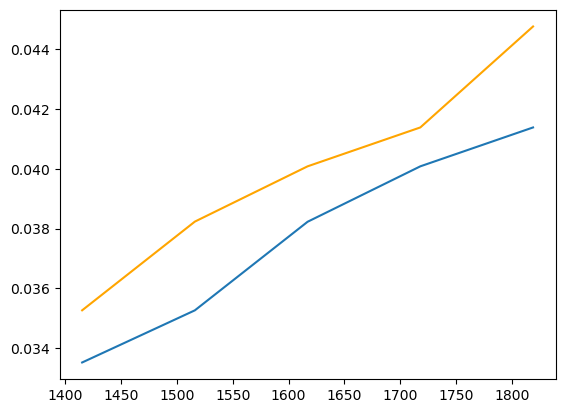

In [31]:
from matplotlib import pyplot as plt
plt.plot(cs_percent)
# plt.twinx()

plt.plot(cs_majors_2_percent, color='orange')

In [4]:
merged['INSTSIZE']

0          3
1          3
2          3
3          3
4          3
          ..
1065385    5
1065386    5
1065387    5
1065388    5
1065389    5
Name: INSTSIZE, Length: 941844, dtype: int64

In [73]:
merged

,UNITID,OPEID6,INSTNM_x,CONTROL_x,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,6.0,...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,8.0,...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065385,495767.0,3329,The Pennsylvania State University,Public,1,5299,"Business, Management, Marketing, and Related S...",1,Undergraduate Certificate or Diploma,NaN,...,1,524,-2,42027,Centre County,4212,-77.862848,40.796500,93,1
1065386,495767.0,3329,The Pennsylvania State University,Public,1,5299,"Business, Management, Marketing, and Related S...",3,Bachelor's Degree,NaN,...,1,524,-2,42027,Centre County,4212,-77.862848,40.796500,93,1
1065387,495767.0,3329,The Pennsylvania State University,Public,1,5401,History.,3,Bachelor's Degree,NaN,...,1,524,-2,42027,Centre County,4212,-77.862848,40.796500,93,1
1065388,495767.0,3329,The Pennsylvania State University,Public,1,5401,History.,5,Master's Degree,NaN,...,1,524,-2,42027,Centre County,4212,-77.862848,40.796500,93,1


In [30]:
counts_by_instsize = merged[['YEAR', 'INSTSIZE','CIPCODE', 'IPEDSCOUNT1', 'IPEDSCOUNT2']]
cs_condition_2 = counts_by_instsize['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))

In [46]:
cs_instsize_groups_1 = counts_by_instsize[cs_condition_2].groupby(['YEAR', 'INSTSIZE'])['IPEDSCOUNT1'].sum()
cs_instsize_groups_2 = counts_by_instsize[cs_condition_2].groupby(['YEAR', 'INSTSIZE'])['IPEDSCOUNT2'].sum()

In [74]:
cs_instsize_groups_1

YEAR  INSTSIZE
1415  -2           1516.0
      -1              0.0
       1           2509.0
       2          22623.0
       3          24434.0
       4          31387.0
       5          51395.0
1516  -2           1523.0
      -1              1.0
       1           2296.0
       2          24087.0
       3          29030.0
       4          33456.0
       5          60654.0
1617  -2           1865.0
      -1              2.0
       1           2405.0
       2          26861.0
       3          30922.0
       4          37773.0
       5          68277.0
1718  -2           1993.0
      -1              0.0
       1           2311.0
       2          28404.0
       3          31121.0
       4          42090.0
       5          76596.0
1819  -2           2151.0
      -1              2.0
       1           2357.0
       2          27948.0
       3          30815.0
       4          45103.0
       5          83948.0
Name: IPEDSCOUNT1, dtype: float64

In [72]:
cs_instsize_groups_1_percent = counts_by_instsize[cs_condition_2].groupby(['YEAR', 'INSTSIZE'])['IPEDSCOUNT1'].sum() / \
    counts_by_instsize.groupby(['YEAR', 'INSTSIZE'])['IPEDSCOUNT1'].sum()
cs_instsize_groups_2_percent = counts_by_instsize[cs_condition_2].groupby(['YEAR', 'INSTSIZE'])['IPEDSCOUNT2'].sum() / \
    counts_by_instsize.groupby(['YEAR', 'INSTSIZE'])['IPEDSCOUNT2'].sum()

In [86]:
cs_instsize_groups_1_percent = cs_instsize_groups_1_percent.reset_index()
cs_instsize_groups_2_percent = cs_instsize_groups_2_percent.reset_index()


In [91]:
cs_instsize_groups_1_percent['INSTSIZE'].unique()
size1 = cs_instsize_groups_1_percent[cs_instsize_groups_1_percent['INSTSIZE'] == 1]

In [ ]:
counts_by_instsize['cs_percentage_1']

In [56]:
cs_instsize_groups_1_percent

YEAR  INSTSIZE
1415  -2          0.044845
      -1          0.000000
       1          0.020183
       2          0.024959
       3          0.032704
       4          0.034755
       5          0.034676
1516  -2          0.043923
      -1          0.004484
       1          0.018885
       2          0.026383
       3          0.037994
       4          0.036002
       5          0.039508
1617  -2          0.055707
      -1          0.009950
       1          0.020506
       2          0.029366
       3          0.040195
       4          0.039489
       5          0.042865
1718  -2          0.056943
      -1          0.000000
       1          0.020029
       2          0.031067
       3          0.039901
       4          0.042326
       5          0.046041
1819  -2          0.061928
      -1          0.012121
       1          0.021129
       2          0.030302
       3          0.039178
       4          0.043677
       5          0.048643
Name: IPEDSCOUNT1, dtype: float64

In [57]:
cs_instsize_groups_2_percent

YEAR  INSTSIZE
1415  -2          0.043923
      -1          0.004484
       1          0.018885
       2          0.026383
       3          0.037994
       4          0.036002
       5          0.039508
1516  -2          0.055707
      -1          0.009950
       1          0.020506
       2          0.029366
       3          0.040195
       4          0.039489
       5          0.042865
1617  -2          0.056943
      -1          0.000000
       1          0.020029
       2          0.031067
       3          0.039901
       4          0.042326
       5          0.046041
1718  -2          0.061928
      -1          0.012121
       1          0.021129
       2          0.030302
       3          0.039178
       4          0.043677
       5          0.048643
1819  -2               NaN
      -1               NaN
       1          0.020257
       2          0.031767
       3          0.040258
       4          0.047710
       5          0.053007
Name: IPEDSCOUNT2, dtype: float64

In [37]:
cs_instsize_groups_1

YEAR  INSTSIZE
1415  -2           1516.0
      -1              0.0
       1           2509.0
       2          22623.0
       3          24434.0
       4          31387.0
       5          51395.0
1516  -2           1523.0
      -1              1.0
       1           2296.0
       2          24087.0
       3          29030.0
       4          33456.0
       5          60654.0
1617  -2           1865.0
      -1              2.0
       1           2405.0
       2          26861.0
       3          30922.0
       4          37773.0
       5          68277.0
1718  -2           1993.0
      -1              0.0
       1           2311.0
       2          28404.0
       3          31121.0
       4          42090.0
       5          76596.0
1819  -2           2151.0
      -1              2.0
       1           2357.0
       2          27948.0
       3          30815.0
       4          45103.0
       5          83948.0
Name: IPEDSCOUNT1, dtype: float64

In [47]:
cs_instsize_groups_2

YEAR  INSTSIZE
1415  -2           1523.0
      -1              1.0
       1           2296.0
       2          24087.0
       3          29030.0
       4          33456.0
       5          60654.0
1516  -2           1865.0
      -1              2.0
       1           2405.0
       2          26861.0
       3          30922.0
       4          37773.0
       5          68277.0
1617  -2           1993.0
      -1              0.0
       1           2311.0
       2          28404.0
       3          31121.0
       4          42090.0
       5          76596.0
1718  -2           2151.0
      -1              2.0
       1           2357.0
       2          27948.0
       3          30815.0
       4          45103.0
       5          83948.0
1819  -2              0.0
      -1              0.0
       1           2122.0
       2          28592.0
       3          31402.0
       4          49434.0
       5          96757.0
Name: IPEDSCOUNT2, dtype: float64

In [93]:
x_axis = counts_by_instsize['YEAR'].sort_values().unique()
size1 = cs_instsize_groups_1_percent[cs_instsize_groups_1_percent['INSTSIZE'] == 1]
size2 = cs_instsize_groups_1_percent[cs_instsize_groups_1_percent['INSTSIZE'] == 2]
size3 = cs_instsize_groups_1_percent[cs_instsize_groups_1_percent['INSTSIZE'] == 3]
size4 = cs_instsize_groups_1_percent[cs_instsize_groups_1_percent['INSTSIZE'] == 4]
size5 = cs_instsize_groups_1_percent[cs_instsize_groups_1_percent['INSTSIZE'] == 5]

In [95]:
size1

,YEAR,INSTSIZE,IPEDSCOUNT1
2,1415,1,0.020183
9,1516,1,0.018885
16,1617,1,0.020506
23,1718,1,0.020029
30,1819,1,0.021129


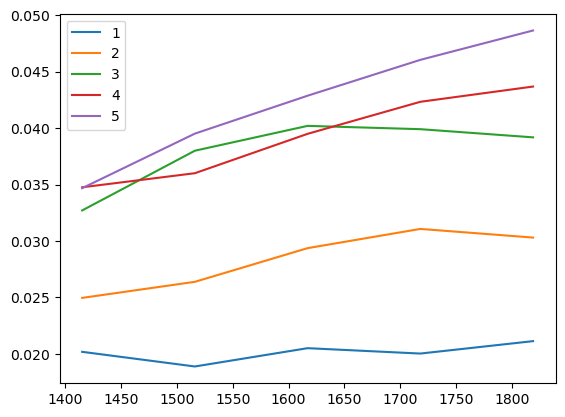

In [100]:
from matplotlib import pyplot as plt
plt.plot(size1['YEAR'], size1['IPEDSCOUNT1'], label='1')
plt.plot(size2['YEAR'], size2['IPEDSCOUNT1'], label='2')
plt.plot(size3['YEAR'], size3['IPEDSCOUNT1'], label='3')
plt.plot(size4['YEAR'], size4['IPEDSCOUNT1'], label='4')
plt.plot(size5['YEAR'], size5['IPEDSCOUNT1'], label='5')
plt.legend()
# plt.plot(x_axis, size2)
# plt.plot(x_axis, size3)
# plt.plot(x_axis, size4)
# plt.plot(x_axis, size5)